# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


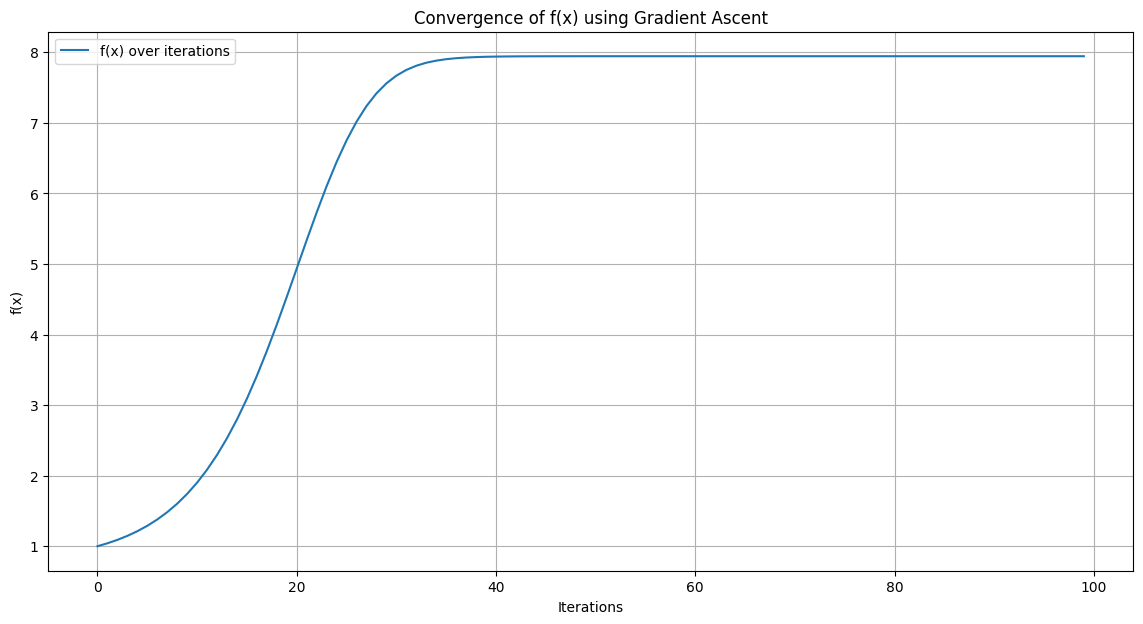


Maximum value of f(x): 7.943973541259766 at x = -1.5256868600845337


In [ ]:
import torch
import matplotlib.pyplot as plt

def f_a(x):
    return -x**4 + 4 * x**2 - 2 * x + 1

learning_rate = 0.01
iterations = 100

x = torch.tensor([0.0], requires_grad=True)

y_values = []

for i in range(iterations):
    y = f_a(x)
    y_values.append(y.item())
    y.backward()
    with torch.no_grad():
        x += learning_rate * x.grad
    x.grad.zero_()


plt.figure(figsize=(14,7))
plt.plot(y_values, label="f(x) over iterations")
plt.title("Convergence of f(x) using Gradient Ascent")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

print(f"\nMaximum value of f(x): {y_values[-1]} at x = {x.item()}")

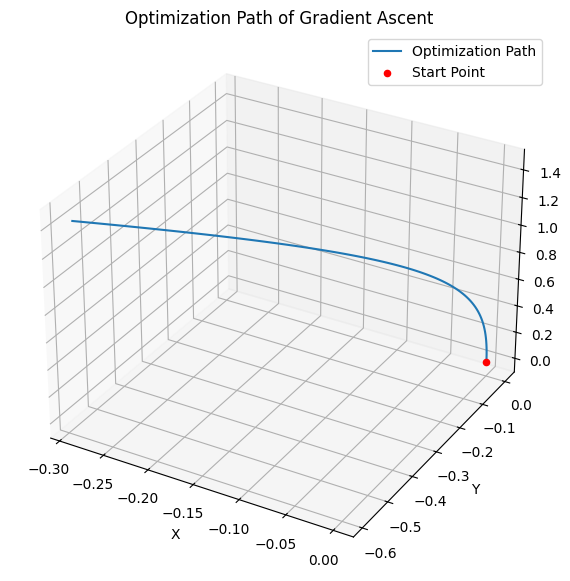


Maximum value of f(x, y, z): 3.0231027603149414 at (x, y, z) = (-0.2951875329017639, -0.599344789981842, 1.448664665222168)


In [ ]:
def f_b(x, y, z):
    return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

learning_rate = 0.01
iterations = 100

x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)
z = torch.tensor([0.0], requires_grad=True)

x_values = []
y_values = []
z_values = []

for i in range(iterations):
    val = f_b(x, y, z)
    x_values.append(x.item())
    y_values.append(y.item())
    z_values.append(z.item())

    val.backward()
    with torch.no_grad():
        x += learning_rate * x.grad
        y += learning_rate * y.grad
        z += learning_rate * z.grad

    x.grad.zero_()
    y.grad.zero_()
    z.grad.zero_()

traj = torch.stack([torch.tensor(x_values), torch.tensor(y_values), torch.tensor(z_values)], dim=1)
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label='Optimization Path')
ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2], color='red', label='Start Point')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title("Optimization Path of Gradient Ascent")
plt.show()

print(f"\nMaximum value of f(x, y, z): {f_b(x, y, z).item()} at (x, y, z) = ({x.item()}, {y.item()}, {z.item()})")

## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [ ]:

import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon



**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


In [ ]:
X_tensor_all = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor_all = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_iterations = 1000
for i in range(num_iterations):
    outputs = model(X_tensor_all)
    loss = criterion(outputs, y_tensor_all)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
        print(f'Iteration [{i + 1}/{num_iterations}], Loss: {loss.item():.4f}')

[w, b] = model.parameters()
print(f"\nLearned parameters: weight = {w.item()}, bias = {b.item()}")

Iteration [100/1000], Loss: 0.3343
Iteration [200/1000], Loss: 0.0158
Iteration [300/1000], Loss: 0.0100
Iteration [400/1000], Loss: 0.0099
Iteration [500/1000], Loss: 0.0099
Iteration [600/1000], Loss: 0.0099
Iteration [700/1000], Loss: 0.0099
Iteration [800/1000], Loss: 0.0099
Iteration [900/1000], Loss: 0.0099
Iteration [1000/1000], Loss: 0.0099

Learned parameters: weight = 2.9996845722198486, bias = 4.019050121307373


## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 1.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


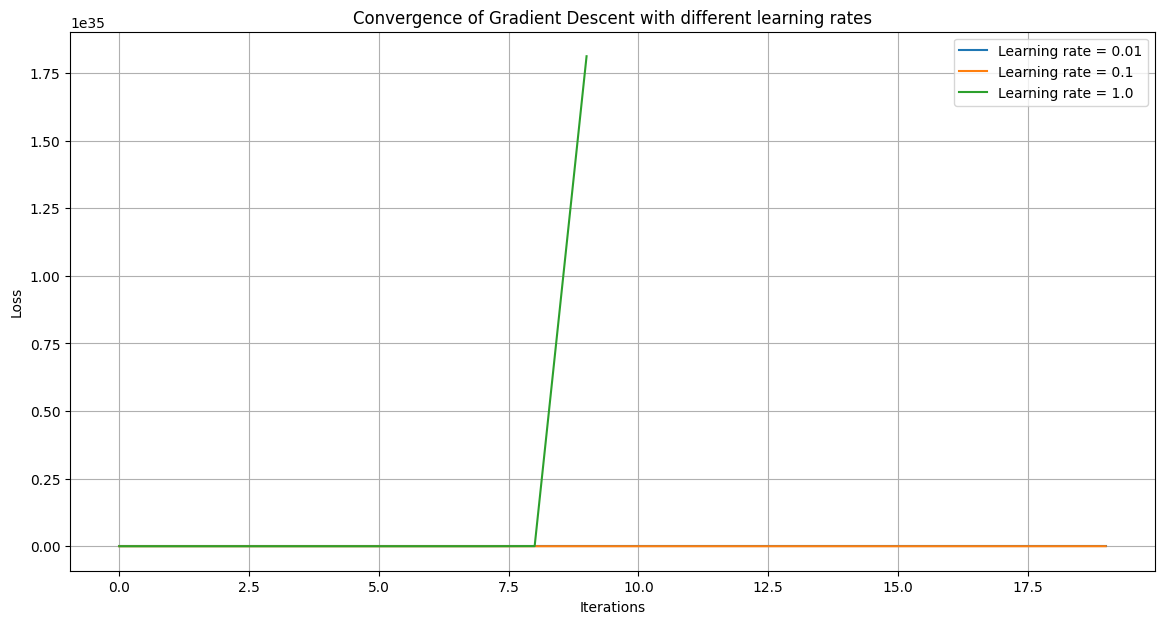

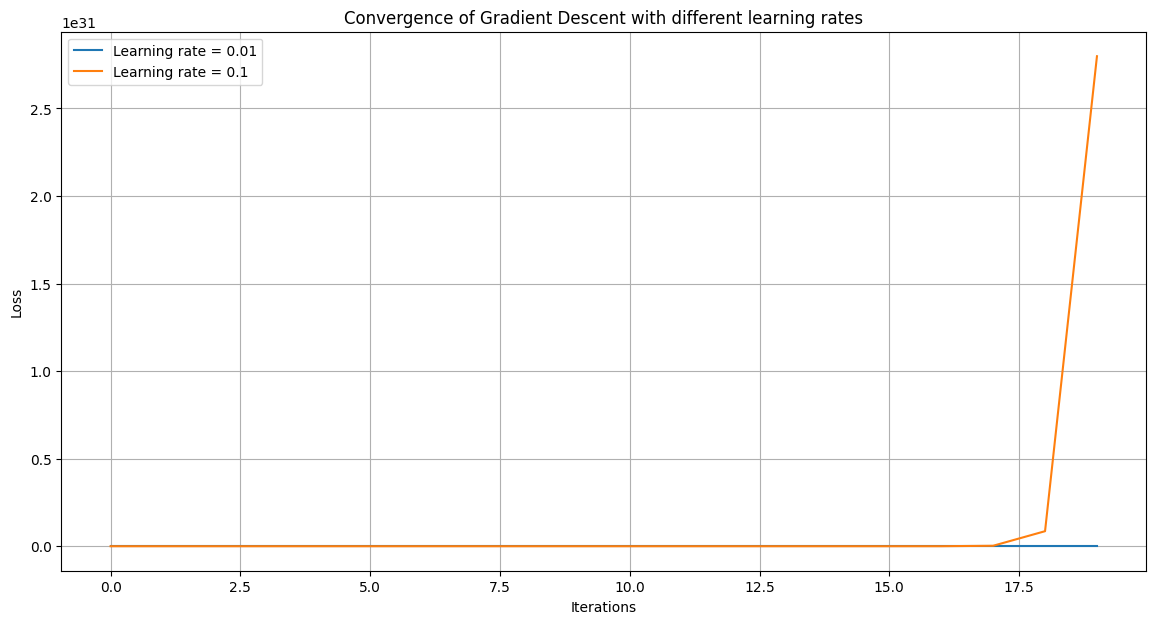

In [8]:
def gradient_descent(learning_rates = [0.01, 0.1, 1.0], num_iterations = 20):
    results = {}
    for lr in learning_rates:
        y_values = []
        model = LinearRegression()
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr)
        for i in range(num_iterations):
            outputs = model(X_tensor_all)
            loss = criterion(outputs, y_tensor_all)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_values.append(loss.item())
        results[lr] = y_values
    return results


results = gradient_descent()
results2 = gradient_descent([0.01, 0.1])


def plot_convergence(results):
  plt.figure(figsize=(14, 7))

  for lr, y_values in results.items():
      plt.plot(y_values, label=f"Learning rate = {lr}")

  plt.title("Convergence of Gradient Descent with different learning rates")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid()
  plt.show()

plot_convergence(results)
print()
plot_convergence(results2)


## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [ ]:

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon



**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


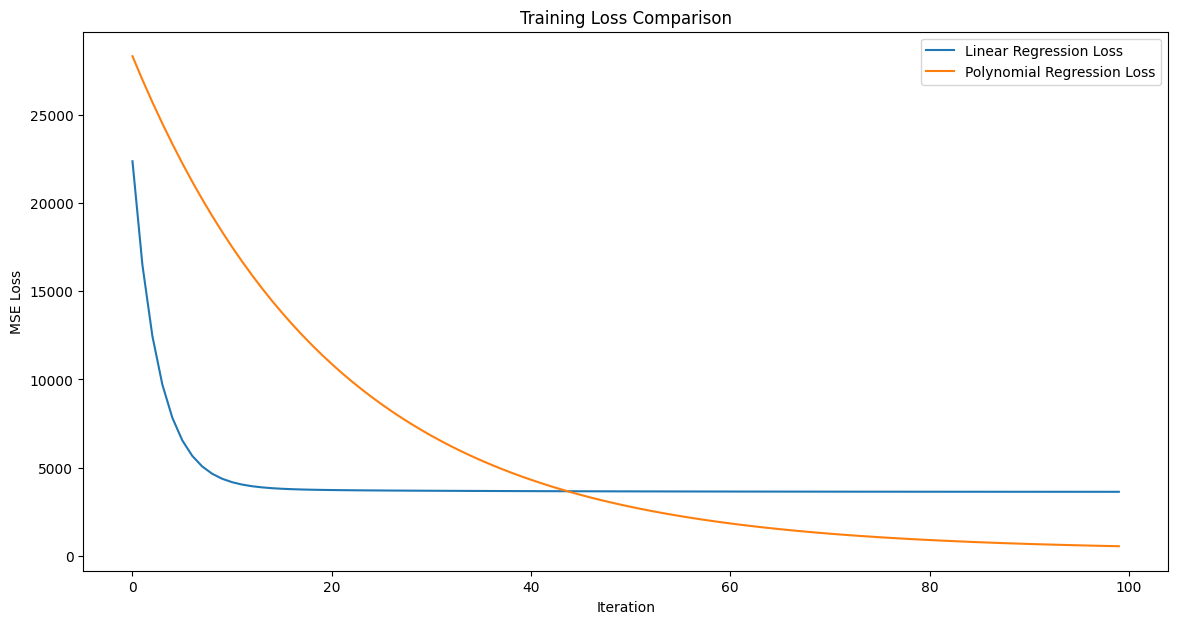


Linear Regression Loss: 3620.3301
Polynomial Regression Loss: 530.8153


In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class PolynomialRegression(torch.nn.Module):
    def __init__(self):
        super(PolynomialRegression, self).__init__()
        self.poly = torch.nn.Linear(4, 1)


    def forward(self, x):
        x_poly = torch.cat([x**i for i in range(4)], dim=1)
        return self.poly(x_poly)

def train_model(model, x, y, criterion, optimizer, num_iterations = 100):
  losses = []
  for i in range(num_iterations):
    outputs = model(x)
    loss = criterion(outputs, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return losses

linear = LinearRegression()
polynomial = PolynomialRegression()


criterion = torch.nn.MSELoss()

optimizer_linear = torch.optim.SGD(linear.parameters(), lr=0.01)
optimizer_polynomial = torch.optim.SGD(polynomial.parameters(), lr=0.000005) # with 0.1 nan

linear_losses = train_model(linear, X_tensor, y_tensor, criterion, optimizer_linear)
polynomial_losses = train_model(polynomial, X_tensor, y_tensor, criterion, optimizer_polynomial)

plt.figure(figsize=(14, 7))
plt.plot(linear_losses, label='Linear Regression Loss')
plt.plot(polynomial_losses, label='Polynomial Regression Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training Loss Comparison')
plt.show()

print(f"\nLinear Regression Loss: {linear_losses[-1]:.4f}")
print(f"Polynomial Regression Loss: {polynomial_losses[-1]:.4f}")

## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [ ]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon



**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

#Linear

linear = LinearRegression()
linear.fit(X_train.reshape(-1, 1), y_train)
y_train_pred_linear = linear.predict(X_train.reshape(-1, 1))
y_val_pred_linear = linear.predict(X_val.reshape(-1, 1))

linear_train_mse = mean_squared_error(y_train, y_train_pred_linear)
linear_val_mse = mean_squared_error(y_val, y_val_pred_linear)


#Polynomial

polynomial_features = PolynomialFeatures(degree=10)
X_train_poly = polynomial_features.fit_transform(X_train.reshape(-1, 1))
X_val_poly = polynomial_features.transform(X_val.reshape(-1, 1))

polynomial =  LinearRegression()
polynomial.fit(X_train_poly, y_train)
y_train_pred_polynomial = polynomial.predict(X_train_poly)
y_val_pred_polynomial = polynomial.predict(X_val_poly)

polynomial_train_mse = mean_squared_error(y_train, y_train_pred_polynomial)
polynomial_val_mse = mean_squared_error(y_val, y_val_pred_polynomial)

#Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

y_train_pred_ridge = ridge.predict(X_train_poly)
y_val_pred_ridge = ridge.predict(X_val_poly)

ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_val_mse = mean_squared_error(y_val, y_val_pred_ridge)

print(f"Linear Regression Train MSE: {linear_train_mse:.4f}")
print(f"Linear Regression Validation MSE: {linear_val_mse:.4f}\n")

print(f"Polynomial Regression Train MSE: {polynomial_train_mse:.4f}")
print(f"Polynomial Regression Validation MSE: {polynomial_val_mse:.4f}\n")

print(f"Ridge Regression Train MSE: {ridge_train_mse:.4f}")
print(f"Ridge Regression Validation MSE: {ridge_val_mse:.4f}\n")

Linear Regression Train MSE: 3571.1876
Linear Regression Validation MSE: 2411.8707

Polynomial Regression Train MSE: 0.9498
Polynomial Regression Validation MSE: 1.2969

Ridge Regression Train MSE: 0.9498
Ridge Regression Validation MSE: 1.2929



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.18802e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We can see that results for Polynomial and Ridge are almost the same

## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 1.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


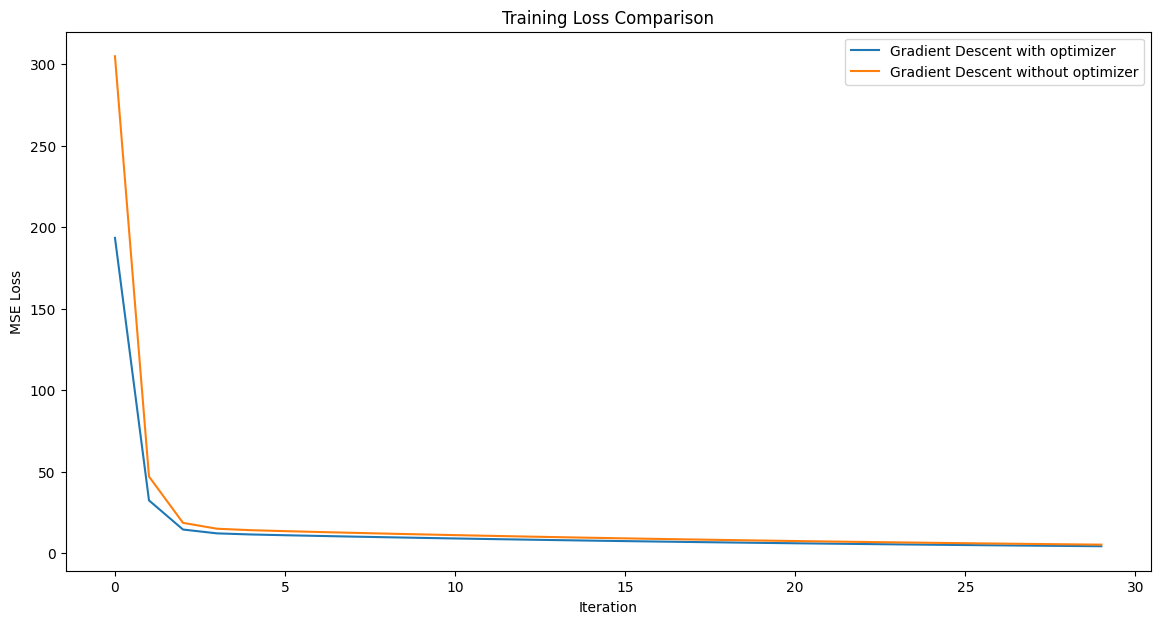

In [ ]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def gradient_descent_no_opt(x, y, lr = 0.01, num_iterations = 30):
  w = torch.tensor([0.0], requires_grad=True)
  b = torch.tensor([0.0], requires_grad=True)
  losses = []
  for i in range(num_iterations):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
      w -= lr * w.grad
      b -= lr * b.grad
      w.grad.zero_()
      b.grad.zero_()
  return losses

def gradient_descent(x, y, learning_rate = 0.01, num_iterations = 30):
  results = []
  model = LinearRegression()
  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
  for i in range(num_iterations):
    outputs = model(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    results.append(loss.item())
  return results

losses_opt = gradient_descent(X_tensor_all, y_tensor_all)
losses_no_opt = gradient_descent_no_opt(X_tensor_all, y_tensor_all)

plt.figure(figsize=(14, 7))
plt.plot(losses_opt, label='Gradient Descent with optimizer')
plt.plot(losses_no_opt, label='Gradient Descent without optimizer')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training Loss Comparison')
plt.show()


## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [ ]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


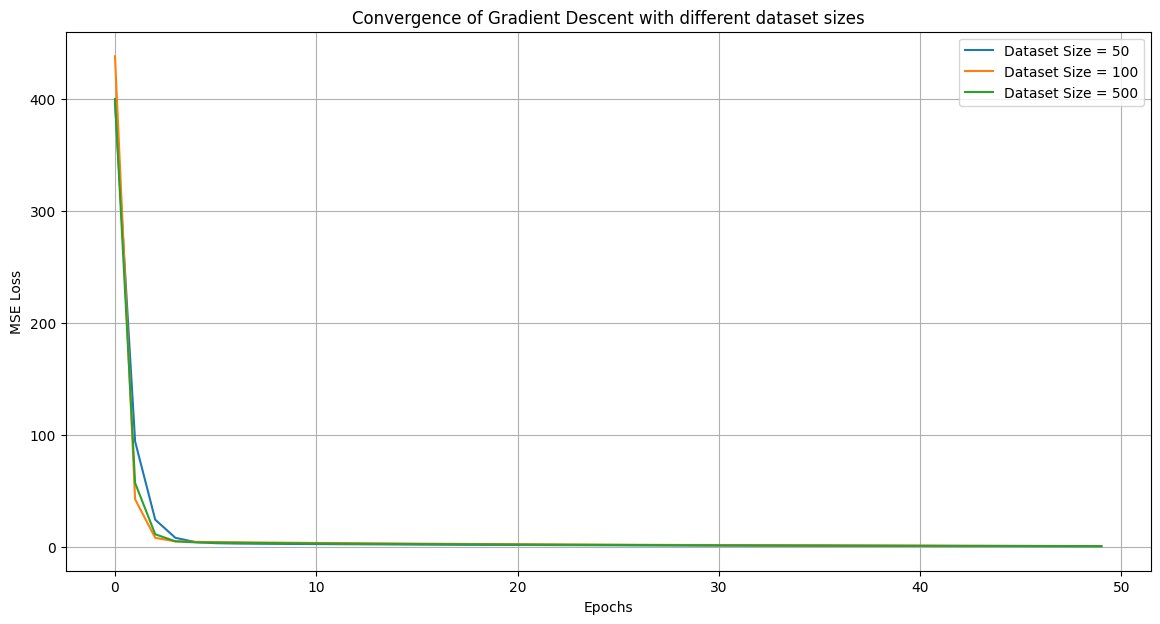

In [ ]:
def train_model(x, y, lr = 0.01, num_epochs = 50):
  x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
  y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
  model = LinearRegression()
  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  losses = []
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  return losses

all_losses = {}
for i, (X, y) in enumerate(datasets):
    losses = train_model(X, y)
    all_losses[i] = losses


plt.figure(figsize=(14, 7))
for i, losses in enumerate(all_losses.values()):
    plt.plot(losses, label=f"Dataset Size = {sizes[i]}")


plt.title("Convergence of Gradient Descent with different dataset sizes")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid()
plt.show()


## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [ ]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon



**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


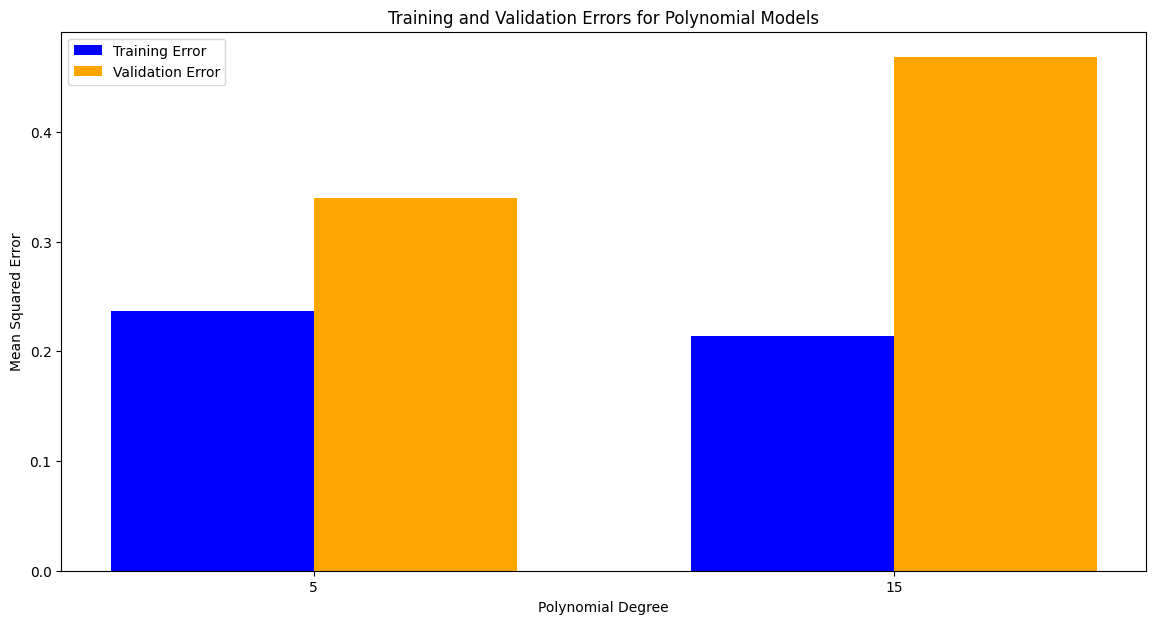

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

poly_features_5 = PolynomialFeatures(degree=5)
X_train_poly_5 = poly_features_5.fit_transform(X_train.reshape(-1, 1))
X_val_poly_5 = poly_features_5.transform(X_val.reshape(-1, 1))

model_5 = LinearRegression()
model_5.fit(X_train_poly_5, y_train)
y_train_pred_5 = model_5.predict(X_train_poly_5)
y_val_pred_5 = model_5.predict(X_val_poly_5)

mse_train_5 = mean_squared_error(y_train, y_train_pred_5)
mse_val_5 = mean_squared_error(y_val, y_val_pred_5)


poly_features_15 = PolynomialFeatures(degree=15)
X_train_poly_15 = poly_features_15.fit_transform(X_train.reshape(-1, 1))
X_val_poly_15 = poly_features_15.transform(X_val.reshape(-1, 1))

model_15 = LinearRegression()
model_15.fit(X_train_poly_15, y_train)
y_train_pred_15 = model_15.predict(X_train_poly_15)
y_val_pred_15 = model_15.predict(X_val_poly_15)

mse_train_15 = mean_squared_error(y_train, y_train_pred_15)
mse_val_15 = mean_squared_error(y_val, y_val_pred_15)


degrees = [5, 15]
train_errors = [mse_train_5, mse_train_15]
val_errors = [mse_val_5, mse_val_15]

bar_width = 0.35
x = np.arange(len(degrees))


plt.figure(figsize=(14, 7))
plt.bar(x - bar_width / 2, train_errors, width=bar_width, label='Training Error', color='blue')
plt.bar(x + bar_width / 2, val_errors, width=bar_width, label='Validation Error', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Errors for Polynomial Models')
plt.xticks(x, degrees)
plt.legend()
plt.show()


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [ ]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.


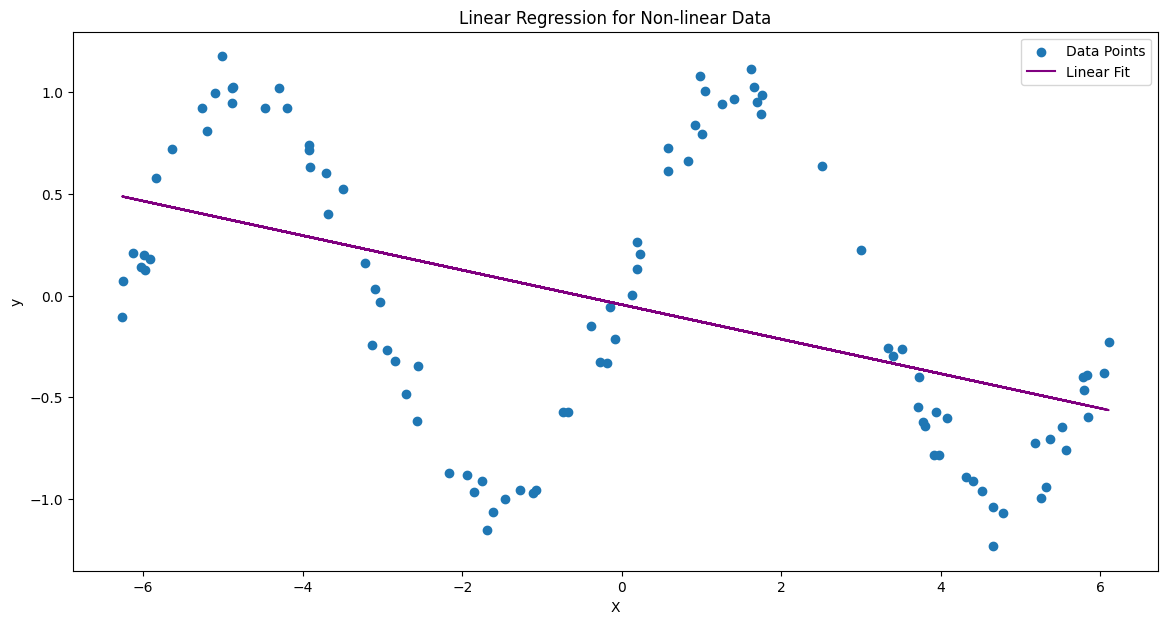

In [ ]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = []
for i in range(1000):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.figure(figsize=(14, 7))
plt.scatter(X, y, label='Data Points')
plt.plot(X, model(X_tensor).detach().numpy(), color="purple", label='Linear Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression for Non-linear Data')
plt.show()


Fitting linear model to non linear data will poorly aproximate the data for most arguments. It doesnt represent function by no mean.

